In [1]:
#Actividad de práctica
from sklearn.datasets import load_iris

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("brain_tumor_dataset.csv")
df = df.head(100)
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,57,Male,Malignant,3.643067,Temporal,Medulloblastoma,IV,Nausea,Seizures,Headache,Yes,No,Yes,71.212734,0.657977,Yes,Negative,Yes
96,97,28,Male,Malignant,0.739781,Parietal,Meningioma,IV,Headache,Headache,Vision Issues,No,Yes,Yes,58.184343,0.199555,Yes,Negative,Yes
97,98,34,Male,Malignant,7.429725,Temporal,Astrocytoma,III,Seizures,Vision Issues,Nausea,Yes,Yes,Yes,91.259050,0.951945,No,Positive,No
98,99,34,Male,Malignant,9.540553,Occipital,Astrocytoma,III,Nausea,Seizures,Headache,Yes,Yes,Yes,79.082038,2.640211,No,Positive,Yes


In [3]:
#Ya ponemos nuestro x limpio
#convierto variables a dummies

X = df.drop(columns=['Tumor_Type',"Patient_ID"])
df_dummies = pd.get_dummies(X, drop_first=True)

X = df_dummies
X


,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate,Gender_Male,Location_Occipital,Location_Parietal,Location_Temporal,Histology_Glioblastoma,Histology_Medulloblastoma,...,Symptom_2_Vision Issues,Symptom_3_Nausea,Symptom_3_Seizures,Symptom_3_Vision Issues,Radiation_Treatment_Yes,Surgery_Performed_Yes,Chemotherapy_Yes,Family_History_Yes,MRI_Result_Positive,Follow_Up_Required_Yes
0,73,5.375612,51.312579,0.111876,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,True
1,26,4.847098,46.373273,2.165736,True,False,True,False,True,False,...,False,True,False,False,True,True,True,True,True,True
2,31,5.588391,47.072221,1.884228,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,29,1.436600,51.853634,1.283342,True,False,False,True,False,True,...,False,False,False,False,True,False,True,True,False,False
4,54,2.417506,54.708987,2.069477,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,57,3.643067,71.212734,0.657977,True,False,False,True,False,True,...,False,False,False,False,True,False,True,True,False,True
96,28,0.739781,58.184343,0.199555,True,False,True,False,False,False,...,False,False,False,True,False,True,True,True,False,True
97,34,7.429725,91.259050,0.951945,True,False,False,True,False,False,...,True,True,False,False,True,True,True,False,True,False
98,34,9.540553,79.082038,2.640211,True,True,False,False,False,False,...,False,False,False,False,True,True,True,False,True,True


In [4]:
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [5]:

#definimos nuestro y
y = df['Tumor_Type']

#Hacemos un SVC con Kernel "Linear" + Hiperparametro "c"
model = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), X.columns)
    ])),
    ('classifier', SVC(kernel='linear', C=1))
])

#Definir el cross validation con K folds = 10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Definir el preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), X.columns)
])

#modelos para hacer la regresión logística segun el Kernel 
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, multi_class='ovr'))]

#Evaluamos con dif kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    models.append((f"SVC {k}", SVC(kernel=k, probability=True)))

resultados = []
for nombre, modelo in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', modelo)
    ])
    
# Calcular AUC 
    auc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc_ovr')
        
    #Calculamos el promedio y el std de los resultados
    resultados.append({
            'Modelo': nombre,
            'AUC promedio': np.mean(auc_scores),
            'AUC std': np.std(auc_scores)
        })

df_resultados = pd.DataFrame(resultados)
df_resultados


c:\Users\Isabela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Isabela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Isabela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Isab

,Modelo,AUC promedio,AUC std
0,Logistic Regression,0.486333,0.199840
1,SVC linear,0.400833,0.207488
2,SVC poly,0.411833,0.169983
3,SVC rbf,0.571833,0.084861
4,SVC sigmoid,0.513000,0.147772


In [6]:
SVC?


Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [7]:
%pip install scikit-learn --upgrade
%pip install skopt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#Optimizacion Bayesiana
#Hacemos un SVC con Kernel "Linear" + Hiperparametro "c"
from sklearn.svm import SVC

svc = SVC(kernel='linear', probability=True, random_state=42)
svc

from skopt import BayesSearchCV

#Definimos los hiperparametros a optimizar
param_space = {
    'C': (1, 100), 
    'gamma': (1, 100)
}

opt = BayesSearchCV(svc, param_space, n_iter=32, random_state=42)
opt.fit(X, y)



,estimator,SVC(kernel='l...ndom_state=42)
,search_spaces,"{'C': (1, ...), 'gamma': (1, ...)}"
,optimizer_kwargs,None
,n_iter,32
,scoring,None
,fit_params,None
,n_jobs,1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,None


In [10]:

#Mostrar resultados de auc promedio de CV
opt.best_params_


OrderedDict([('C', 26), ('gamma', 100)])

In [11]:
opt.best_score_

np.float64(0.4800000000000001)

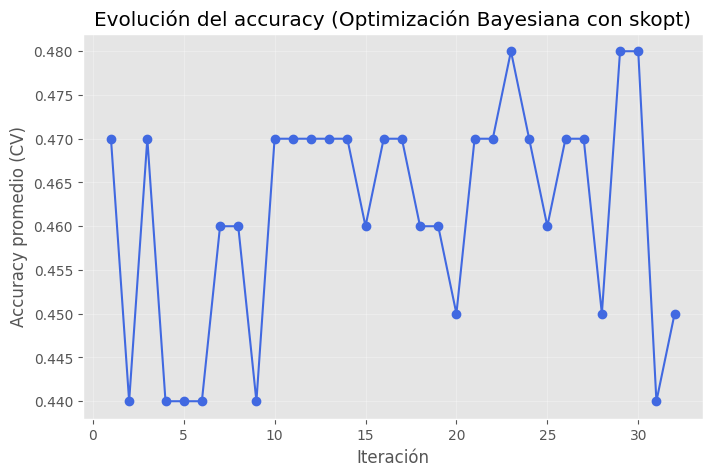

In [30]:
scores = opt.cv_results_['mean_test_score']
C_values = [p['C'] for p in opt.cv_results_['params']]

plt.figure(figsize=(8,5))
plt.plot(range(1, len(scores)+1), scores, marker='o', color='royalblue')
plt.title("Evolución del accuracy (Optimización Bayesiana con skopt)")
plt.xlabel("Iteración")
plt.ylabel("Accuracy promedio (CV)")
plt.grid(alpha=0.3)
plt.show()
